In this notebook, we play around with using Capyldi (Capaldi?) to do bulk runs on the whereistheboom.csv dump.

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import numpy.random as npr
from tqdm import tqdm
import requests
import sys

sys.path.append('../../../capyldi')
from capyldi import capyldi

%matplotlib inline

In [2]:
base_df = pd.read_csv('../data/instagram/instagram_yemen_user_posts_shrunk.csv',
                      parse_dates=['timestamp'])
del base_df['epoch']
base_df.columns = ['id', 'lat_lon', 'date_col']
df = base_df.date_col.value_counts().reset_index()
df.columns = ['date_col', 'count_col']

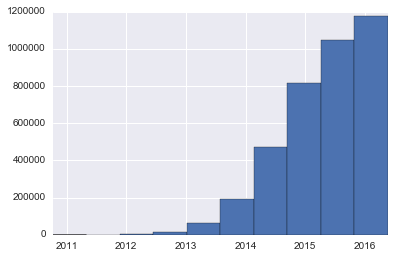

In [3]:
df.date_col.hist()

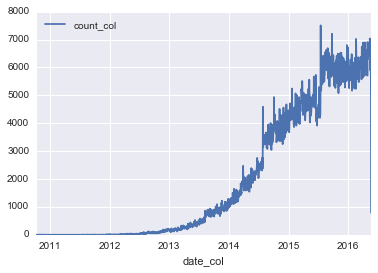

In [4]:
per_day_df = df.set_index('date_col').groupby(pd.TimeGrouper('1D')).sum().fillna(0).reset_index()
per_day_df.plot(x='date_col', y='count_col', kind='line')

---

In [7]:
results = capyldi(df, ['mmpp'])

Grouping by time interval:   0%|          | 0/11 [00:00<?, ?it/s]
Analyzing: 0it [00:00, ?it/s]
Grouping by time interval:   9%|▉         | 1/11 [00:00<00:02,  3.57it/s]
Analyzing: 0it [00:00, ?it/s]
Grouping by time interval:  18%|█▊        | 2/11 [00:00<00:02,  4.13it/s]
Analyzing: 0it [00:00, ?it/s]
Grouping by time interval:  27%|██▋       | 3/11 [00:00<00:01,  4.68it/s]
Analyzing: 0it [00:00, ?it/s]
Grouping by time interval:  36%|███▋      | 4/11 [00:00<00:01,  5.31it/s]
Analyzing: 0it [00:00, ?it/s]
Grouping by time interval:  45%|████▌     | 5/11 [00:00<00:01,  5.74it/s]
Analyzing: 0it [00:00, ?it/s]
Grouping by time interval:  55%|█████▍    | 6/11 [00:00<00:00,  6.05it/s]
Analyzing: 0it [00:00, ?it/s]
Grouping by time interval:  64%|██████▎   | 7/11 [00:01<00:00,  6.29it/s]
Analyzing: 0it [00:00, ?it/s]
Grouping by time interval:  73%|███████▎  | 8/11 [00:01<00:00,  6.44it/s]
Analyzing: 0it [00:00, ?it/s]
Grouping by time interval:  82%|████████▏ | 9/11 [00:01<00:00,  6.60it/s

In [8]:
import pickle
with open('results_yemen_user_posts_shrunk_mmpp.pkl', 'wb') as outfile:
    pickle.dump(results, outfile)